In [1]:
import requests
import pandas as pd
import numpy as np
import matplotlib 
pd.options.display.max_columns = None

url = 'https://fantasy.premierleague.com/api/bootstrap-static/'
#Use the requests package to make a GET request from the API endpoint:
r = requests.get(url)
#Then, transform that request into a json object:
json = r.json()
#Let’s look at the json keys, and then we’ll create our dataframe(s)
json.keys()

elements_df = pd.DataFrame(json['elements'])
elements_types_df = pd.DataFrame(json['element_types'])
teams_df = pd.DataFrame(json['teams'])
#Preview the top 5 rows of your dataframes with the head() method. Like so:
elements_df.head()

,chance_of_playing_next_round,chance_of_playing_this_round,code,cost_change_event,cost_change_event_fall,cost_change_start,cost_change_start_fall,dreamteam_count,element_type,ep_next,ep_this,event_points,first_name,form,id,in_dreamteam,news,news_added,now_cost,photo,points_per_game,second_name,selected_by_percent,special,squad_number,status,team,team_code,total_points,transfers_in,transfers_in_event,transfers_out,transfers_out_event,value_form,value_season,web_name,minutes,goals_scored,assists,clean_sheets,goals_conceded,own_goals,penalties_saved,penalties_missed,yellow_cards,red_cards,saves,bonus,bps,influence,creativity,threat,ict_index,influence_rank,influence_rank_type,creativity_rank,creativity_rank_type,threat_rank,threat_rank_type,ict_index_rank,ict_index_rank_type,corners_and_indirect_freekicks_order,corners_and_indirect_freekicks_text,direct_freekicks_order,direct_freekicks_text,penalties_order,penalties_text
0,75.0,75.0,80201,0,0,-4,4,0,1,0.4,0.0,0,Bernd,0.0,1,False,Groin Injury - 75% chance of playing,2021-12-06T23:00:13.342729Z,46,80201.jpg,1.3,Leno,0.9,False,None,d,1,3,4,60619,17,179754,224,0.0,0.9,Leno,270,0,0,0,9,0,0,0,0,0,9,0,48,79.0,0.0,0.0,7.9,309,25,599,64,582,58,374,25,NaN,,NaN,,NaN,
1,0.0,0.0,115918,0,0,0,0,0,1,0.0,0.0,0,Rúnar Alex,0.0,2,False,Joined OH Leuven on a season-long loan - Expec...,2021-08-31T22:00:09.069158Z,40,115918.jpg,0.0,Rúnarsson,0.7,False,None,u,1,3,0,19017,0,68006,96,0.0,0.0,Rúnarsson,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,466,43,453,23,414,14,470,43,NaN,,NaN,,NaN,
2,0.0,0.0,47431,0,0,-2,2,0,3,0.0,0.0,0,Willian,0.0,3,False,Transferred to Corinthians,2021-08-20T09:30:14.065783Z,63,47431.jpg,0.0,Borges Da Silva,0.1,False,None,u,1,3,0,914,0,20305,5,0.0,0.0,Willian,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,646,263,645,263,645,263,646,263,NaN,,NaN,,NaN,
3,100.0,0.0,54694,0,0,-4,4,0,4,1.5,0.0,0,Pierre-Emerick,1.0,4,False,,2021-12-14T12:00:15.737242Z,96,54694.jpg,3.1,Aubameyang,2.0,False,None,a,1,3,44,730429,296,817363,4824,0.1,4.6,Aubameyang,1036,4,1,6,16,0,0,2,3,0,0,7,131,217.6,132.4,582.0,92.9,127,14,137,22,8,4,32,11,NaN,,NaN,,1.0,
4,NaN,NaN,58822,0,0,-3,3,0,2,0.5,0.0,0,Cédric,0.0,5,False,,None,42,58822.jpg,0.3,Soares,0.2,False,None,a,1,3,1,12036,25,23470,31,0.0,0.2,Cédric,188,0,0,0,7,0,0,0,1,0,0,0,21,30.8,36.1,1.0,6.8,372,140,285,89,390,146,381,136,NaN,,NaN,,NaN,


In [2]:
elements_df.columns

Index(['chance_of_playing_next_round', 'chance_of_playing_this_round', 'code',
       'cost_change_event', 'cost_change_event_fall', 'cost_change_start',
       'cost_change_start_fall', 'dreamteam_count', 'element_type', 'ep_next',
       'ep_this', 'event_points', 'first_name', 'form', 'id', 'in_dreamteam',
       'news', 'news_added', 'now_cost', 'photo', 'points_per_game',
       'second_name', 'selected_by_percent', 'special', 'squad_number',
       'status', 'team', 'team_code', 'total_points', 'transfers_in',
       'transfers_in_event', 'transfers_out', 'transfers_out_event',
       'value_form', 'value_season', 'web_name', 'minutes', 'goals_scored',
       'assists', 'clean_sheets', 'goals_conceded', 'own_goals',
       'penalties_saved', 'penalties_missed', 'yellow_cards', 'red_cards',
       'saves', 'bonus', 'bps', 'influence', 'creativity', 'threat',
       'ict_index', 'influence_rank', 'influence_rank_type', 'creativity_rank',
       'creativity_rank_type', 'threat_rank'

In [3]:
slim_elements_df = elements_df[['first_name','second_name','team','element_type','selected_by_percent','now_cost','minutes','transfers_in','value_season','total_points']]

In [4]:
slim_elements_df.head()

,first_name,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points
0,Bernd,Leno,1,1,0.9,46,270,60619,0.9,4
1,Rúnar Alex,Rúnarsson,1,1,0.7,40,0,19017,0.0,0
2,Willian,Borges Da Silva,1,3,0.1,63,0,914,0.0,0
3,Pierre-Emerick,Aubameyang,1,4,2.0,96,1036,730429,4.6,44
4,Cédric,Soares,1,2,0.2,42,188,12036,0.2,1


In [5]:
slim_elements_df['position'] = slim_elements_df.element_type.map(elements_types_df.set_index('id').singular_name)

C:\Users\donvb\AppData\Local\Temp/ipykernel_9676/1996727139.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  slim_elements_df['position'] = slim_elements_df.element_type.map(elements_types_df.set_index('id').singular_name)


In [6]:
slim_elements_df.head(30)

,first_name,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,position
0,Bernd,Leno,1,1,0.9,46,270,60619,0.9,4,Goalkeeper
1,Rúnar Alex,Rúnarsson,1,1,0.7,40,0,19017,0.0,0,Goalkeeper
2,Willian,Borges Da Silva,1,3,0.1,63,0,914,0.0,0,Midfielder
3,Pierre-Emerick,Aubameyang,1,4,2.0,96,1036,730429,4.6,44,Forward
4,Cédric,Soares,1,2,0.2,42,188,12036,0.2,1,Defender
5,Alexandre,Lacazette,1,4,1.7,83,566,126495,3.1,26,Forward
6,Granit,Xhaka,1,3,0.3,48,510,18822,1.9,9,Midfielder
7,Pablo,Marí,1,2,0.1,42,180,5321,0.2,1,Defender
8,Héctor,Bellerín,1,2,0.2,48,0,3737,0.0,0,Defender
9,Calum,Chambers,1,2,0.2,42,170,9856,0.2,1,Defender


In [7]:
slim_elements_df['team'] = slim_elements_df.team.map(teams_df.set_index('id').name)

C:\Users\donvb\AppData\Local\Temp/ipykernel_9676/2815011068.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  slim_elements_df['team'] = slim_elements_df.team.map(teams_df.set_index('id').name)


In [8]:
slim_elements_df.head()

,first_name,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,position
0,Bernd,Leno,Arsenal,1,0.9,46,270,60619,0.9,4,Goalkeeper
1,Rúnar Alex,Rúnarsson,Arsenal,1,0.7,40,0,19017,0.0,0,Goalkeeper
2,Willian,Borges Da Silva,Arsenal,3,0.1,63,0,914,0.0,0,Midfielder
3,Pierre-Emerick,Aubameyang,Arsenal,4,2.0,96,1036,730429,4.6,44,Forward
4,Cédric,Soares,Arsenal,2,0.2,42,188,12036,0.2,1,Defender


In [9]:
slim_elements_df['value'] = slim_elements_df.value_season.astype(float)

C:\Users\donvb\AppData\Local\Temp/ipykernel_9676/505541812.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  slim_elements_df['value'] = slim_elements_df.value_season.astype(float)


In [10]:
slim_elements_df.head()

,first_name,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,position,value
0,Bernd,Leno,Arsenal,1,0.9,46,270,60619,0.9,4,Goalkeeper,0.9
1,Rúnar Alex,Rúnarsson,Arsenal,1,0.7,40,0,19017,0.0,0,Goalkeeper,0.0
2,Willian,Borges Da Silva,Arsenal,3,0.1,63,0,914,0.0,0,Midfielder,0.0
3,Pierre-Emerick,Aubameyang,Arsenal,4,2.0,96,1036,730429,4.6,44,Forward,4.6
4,Cédric,Soares,Arsenal,2,0.2,42,188,12036,0.2,1,Defender,0.2


In [11]:
slim_elements_df.sort_values('value',ascending=False).head(10)

,first_name,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,position,value
642,José,Malheiro de Sá,Wolves,1,3.8,51,1506,541462,15.1,77,Goalkeeper,15.1
198,Conor,Gallagher,Crystal Palace,3,28.3,62,1381,3462904,14.4,89,Midfielder,14.4
576,Emmanuel,Dennis,Watford,4,37.8,59,1168,4309283,14.2,84,Forward,14.2
33,Aaron,Ramsdale,Arsenal,1,16.7,51,1215,1571704,13.9,71,Goalkeeper,13.9
621,Conor,Coady,Wolves,2,6.8,45,1502,566036,13.8,62,Defender,13.8
374,João Pedro Cavaco,Cancelo,Man City,2,33.1,68,1427,3298100,13.4,91,Defender,13.4
348,Trent,Alexander-Arnold,Liverpool,2,42.6,82,1233,2950954,13.2,108,Defender,13.2
176,Antonio,Rüdiger,Chelsea,2,24.3,62,1350,2716916,13.1,81,Defender,13.1
21,Gabriel,Magalhães,Arsenal,2,4.8,52,1193,516172,13.1,68,Defender,13.1
631,Max,Kilman,Wolves,2,0.5,45,1506,71375,13.1,59,Defender,13.1


In [12]:
slim_elements_df.pivot_table(index='position',values='value',aggfunc=np.mean).reset_index()

,position,value
0,Defender,4.248416
1,Forward,3.135227
2,Goalkeeper,3.055263
3,Midfielder,3.689474


In [13]:
pivot=slim_elements_df.pivot_table(index='position',values='value',aggfunc=np.mean).reset_index()
pivot.sort_values('value',ascending=False)

,position,value
0,Defender,4.248416
3,Midfielder,3.689474
1,Forward,3.135227
2,Goalkeeper,3.055263


In [14]:
slim_elements_df = slim_elements_df.loc[slim_elements_df.value > 0]

In [15]:
pivot=slim_elements_df.pivot_table(index='position',values='value',aggfunc=np.mean).reset_index()
pivot.sort_values('value',ascending=False)

,position,value
2,Goalkeeper,7.036364
0,Defender,5.980255
3,Midfielder,4.834483
1,Forward,4.244615


In [16]:
team_pivot = slim_elements_df.pivot_table(index='team',values='value',aggfunc=np.mean).reset_index()
team_pivot.sort_values('value',ascending=False)

,team,value
19,Wolves,7.611111
18,West Ham,6.894737
5,Chelsea,6.392000
11,Man City,6.386957
10,Liverpool,6.064000
2,Brentford,5.809091
6,Crystal Palace,5.743478
1,Aston Villa,5.312000
4,Burnley,5.305263
0,Arsenal,5.215385


In [17]:
fwd_df = slim_elements_df.loc[slim_elements_df.position == 'Forward']
mid_df = slim_elements_df.loc[slim_elements_df.position == 'Midfielder']
def_df = slim_elements_df.loc[slim_elements_df.position == 'Defender']
gol_df = slim_elements_df.loc[slim_elements_df.position == 'Goalkeeper']

<AxesSubplot:>

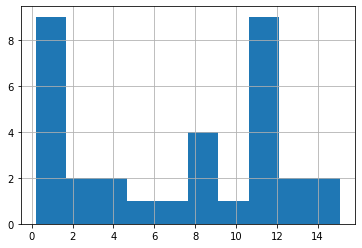

In [18]:
gol_df.value.hist()

In [19]:
gol_df.sort_values('value',ascending=False).head(20)

,first_name,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,position,value
642,José,Malheiro de Sá,Wolves,1,3.8,51,1506,541462,15.1,77,Goalkeeper,15.1
33,Aaron,Ramsdale,Arsenal,1,16.7,51,1215,1571704,13.9,71,Goalkeeper,13.9
398,David,de Gea,Man Utd,1,8.2,51,1440,858126,12.9,66,Goalkeeper,12.9
38,Emiliano,Martínez,Aston Villa,1,13.6,55,1440,414755,12.2,67,Goalkeeper,12.2
342,Alisson,Ramses Becker,Liverpool,1,8.2,60,1350,569821,12.0,72,Goalkeeper,12.0
490,Alex,McCarthy,Southampton,1,3.0,45,1350,465549,11.8,53,Goalkeeper,11.8
517,Hugo,Lloris,Spurs,1,7.9,54,1260,888247,11.7,63,Goalkeeper,11.7
199,Vicente,Guaita,Crystal Palace,1,8.8,46,1440,676450,11.7,54,Goalkeeper,11.7
120,Robert,Sánchez,Brighton,1,18.2,46,1326,1034646,11.5,53,Goalkeeper,11.5
375,Ederson,Santana de Moraes,Man City,1,9.6,60,1440,517180,11.5,69,Goalkeeper,11.5


,first_name,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,position,value
621,Conor,Coady,Wolves,2,6.8,45,1502,566036,13.8,62,Defender,13.8
374,João Pedro Cavaco,Cancelo,Man City,2,33.1,68,1427,3298100,13.4,91,Defender,13.4
348,Trent,Alexander-Arnold,Liverpool,2,42.6,82,1233,2950954,13.2,108,Defender,13.2
631,Max,Kilman,Wolves,2,0.5,45,1506,71375,13.1,59,Defender,13.1
21,Gabriel,Magalhães,Arsenal,2,4.8,52,1193,516172,13.1,68,Defender,13.1
176,Antonio,Rüdiger,Chelsea,2,24.3,62,1350,2716916,13.1,81,Defender,13.1
623,Romain,Saïss,Wolves,2,1.2,50,1454,172646,13.0,65,Defender,13.0
71,Pontus,Jansson,Brentford,2,7.8,46,1431,1173547,12.8,59,Defender,12.8
340,Virgil,van Dijk,Liverpool,2,19.5,67,1440,1178901,12.4,83,Defender,12.4
26,Ben,White,Arsenal,2,12.7,44,1305,790513,12.3,54,Defender,12.3


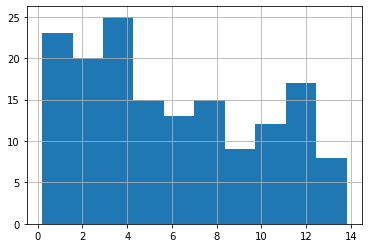

In [20]:
def_df.value.hist()
def_df.sort_values('value',ascending=False).head(20)

,first_name,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,position,value
344,Mohamed,Salah,Liverpool,3,73.5,131,1440,2702634,12.2,160,Midfielder,12.2
379,Bernardo Mota,Veiga de Carvalho e Silva,Man City,3,31.6,77,1343,2982781,11.8,91,Midfielder,11.8
198,Conor,Gallagher,Crystal Palace,3,28.3,62,1381,3462904,14.4,89,Midfielder,14.4
341,Sadio,Mané,Liverpool,3,4.0,119,1360,534264,6.9,82,Midfielder,6.9
522,Heung-Min,Son,Spurs,3,16.3,103,1138,2429939,7.9,81,Midfielder,7.9
351,Diogo,Jota,Liverpool,3,27.5,80,1032,3747674,10.0,80,Midfielder,10.0
186,Mason,Mount,Chelsea,3,20.2,76,794,2295074,10.1,77,Midfielder,10.1
312,Raphael,Dias Belloli,Leeds,3,17.7,66,1258,2453967,11.4,75,Midfielder,11.4
603,Jarrod,Bowen,West Ham,3,7.5,65,1363,811328,11.5,75,Midfielder,11.5
405,Bruno Miguel,Borges Fernandes,Man Utd,3,15.4,116,1379,998526,6.0,70,Midfielder,6.0


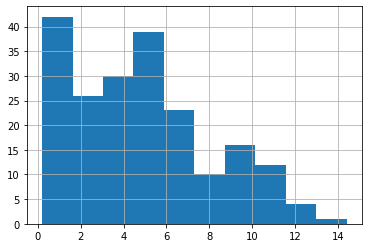

In [21]:
mid_df.value.hist()
mid_df.sort_values('total_points',ascending=False).head(50)


In [22]:
mid_df2 = mid_df.loc[(mid_df.total_points > 150) & (mid_df.value > 20.0)]
mid_df2.sort_values('vtotal_points',ascending=False).head(20)

SyntaxError: invalid syntax (Temp/ipykernel_9676/3356179600.py, line 2)

In [ ]:
fwd_df2 = fwd_df.loc[(fwd_df.total_points > (fwd_df['total_points'].mean()))]
fwd_df2.sort_values('value',ascending=False).head(50)

,first_name,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,position,value
229,Patrick,Bamford,Leeds,4,18.1,80,3052,0,24.2,194,Forward,24.2
42,Ollie,Watkins,Aston Villa,4,31.6,75,3328,0,22.4,168,Forward,22.4
190,Dominic,Calvert-Lewin,Everton,4,27.3,80,2871,0,20.6,165,Forward,20.6
117,Chris,Wood,Burnley,4,2.8,70,2741,0,19.7,138,Forward,19.7
375,Che,Adams,Southampton,4,1.7,70,2662,0,19.6,137,Forward,19.6
389,Harry,Kane,Spurs,4,26.1,125,3083,0,19.4,242,Forward,19.4
320,Callum,Wilson,Newcastle,4,5.2,75,2081,0,17.9,134,Forward,17.9
203,Jamie,Vardy,Leicester,4,9.6,105,2838,0,17.8,187,Forward,17.8
55,Danny,Ings,Aston Villa,4,8.4,80,2172,0,16.4,131,Forward,16.4
193,Richarlison,de Andrade,Everton,4,6.6,75,2862,0,16.4,123,Forward,16.4


In [ ]:
fwd_df['total_points'].mean()

88.79545454545455

In [ ]:
slim_elements_df['total_points'].mean()

74.7817679558011

In [ ]:
allp_df = slim_elements_df.loc[(slim_elements_df.total_points > (slim_elements_df['total_points'].mean()) + 20)]
allp_df.sort_values('total_points',ascending=False).tail(20)

,first_name,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,position,value
13,Rob,Holding,Arsenal,2,3.3,45,2557,0,23.3,105,Defender,23.3
27,Ben,White,Arsenal,2,21.9,45,3192,0,23.1,104,Defender,23.1
477,Rúben Diogo,da Silva Neves,Wolves,3,1.4,55,2670,0,18.9,104,Midfielder,18.9
118,Matthew,Lowton,Burnley,2,3.2,45,3060,0,22.9,103,Defender,22.9
306,Victor,Lindelöf,Man Utd,2,0.6,50,2585,0,20.4,102,Defender,20.4
114,Ben,Mee,Burnley,2,0.9,50,2693,0,20.4,102,Defender,20.4
216,James,Justin,Leicester,2,0.1,50,2070,0,20.2,101,Defender,20.2
96,Robert,Sánchez,Brighton,1,23.4,45,2430,0,22.4,101,Goalkeeper,22.4
179,James,Rodríguez,Everton,3,4.0,70,1763,0,14.4,101,Midfielder,14.4
449,Angelo,Ogbonna,West Ham,2,0.5,50,2492,0,20.0,100,Defender,20.0
